# Kaggle Titanic Solution

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
%matplotlib inline

### Import Train/Test Datasets; both are placed in the same folder as this notebook

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Check first 5 rows of the Train/Test dataset imported

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Check variables and missing value Train/Test

In [5]:
train.describe() #891 rows in Train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe() #418 rows in Test, test start from 892 onwards 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Concatenate Train and Test & Check Missing Values

In [7]:
titanic = pd.concat([train,test], sort = False)
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Check Missing Values using map

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Treat Age & Fare

In [9]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
#Age
titanic.loc[ titanic['Age'] <= 16, 'Age'] = 0
titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age'] = 1
titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] = 2
titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 3
titanic.loc[ titanic['Age'] > 64, 'Age'] = 4 ;

In [11]:
# Mapping Fare
titanic.loc[ titanic['Fare'] <= 7.91, 'Fare'] = 0
titanic.loc[(titanic['Fare'] > 7.91) & (titanic['Fare'] <= 14.454), 'Fare'] = 1
titanic.loc[(titanic['Fare'] > 14.454) & (titanic['Fare'] <= 31), 'Fare']   = 2
titanic.loc[ titanic['Fare'] > 31, 'Fare'] = 3

### Treat Cabin

In [12]:
#Check how many missing values are there
#Numpy function is used to get count
np.count_nonzero(titanic['Cabin'].isnull())

1014

In [13]:
#Most cases are missing so we will fill it with 'Missing'
titanic['Cabin'] = titanic['Cabin'].fillna('Missing')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Treat Embarked

In [14]:
#Check where did most of the passengers Embarked from
titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
#Use the idxmax to extra the index of a series who value is maximum
titanic['Embarked'].value_counts().idxmax()

'S'

In [16]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
#Or directly in one line 
#titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].value_counts().idxmax())

In [17]:
#Check again
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,1.294882,0.498854,0.385027,1.501146
std,378.020061,0.486592,0.837836,0.796675,1.041658,0.865560,1.127651
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000
75%,982.000000,1.000000,3.000000,2.000000,1.000000,0.000000,3.000000
max,1309.000000,1.000000,3.000000,4.000000,8.000000,9.000000,3.000000


# Creating Features

In [19]:
titanic['Pclass'] = titanic['Pclass'].astype(str)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null object
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 132.9+ KB


In [20]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [21]:
titanic['Title'] = titanic['Name'].apply(get_title)

In [22]:
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [23]:
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

In [24]:
titanic['Cabin'] = titanic['Cabin'].str[0]
titanic['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [25]:
titanic['Cabin'] = titanic['Cabin'].replace(['F', 'G','T'], 'O')
titanic['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
O      27
A      22
Name: Cabin, dtype: int64

In [26]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] == 1, 'IsAlone'] = 1

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,M,S,Mr,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3.0,C,C,Mrs,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1.0,M,S,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3.0,C,S,Mrs,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1.0,M,S,Mr,1,1


## Model 1 : Var for Model

In [28]:
titanic_all = titanic.drop(['PassengerId','Name','Ticket'],axis=1)

In [29]:
titanic_all.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0.0,3,male,1.0,1,0,0.0,M,S,Mr,2,0
1,1.0,1,female,2.0,1,0,3.0,C,C,Mrs,2,0
2,1.0,3,female,1.0,0,0,1.0,M,S,Miss,1,1
3,1.0,1,female,2.0,1,0,3.0,C,S,Mrs,2,0
4,0.0,3,male,2.0,0,0,1.0,M,S,Mr,1,1


### Divide Dataset into train and test after cleaning missing values

In [30]:
titanic_dummies=pd.get_dummies(titanic_all, drop_first = True)
titanic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 22 columns):
Survived      891 non-null float64
Age           1309 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Fare          1309 non-null float64
FamilySize    1309 non-null int64
IsAlone       1309 non-null int64
Pclass_2      1309 non-null uint8
Pclass_3      1309 non-null uint8
Sex_male      1309 non-null uint8
Cabin_B       1309 non-null uint8
Cabin_C       1309 non-null uint8
Cabin_D       1309 non-null uint8
Cabin_E       1309 non-null uint8
Cabin_M       1309 non-null uint8
Cabin_O       1309 non-null uint8
Embarked_Q    1309 non-null uint8
Embarked_S    1309 non-null uint8
Title_Miss    1309 non-null uint8
Title_Mr      1309 non-null uint8
Title_Mrs     1309 non-null uint8
Title_Rare    1309 non-null uint8
dtypes: float64(3), int64(4), uint8(15)
memory usage: 101.0 KB


In [31]:
#Get Train
t_train = titanic_dummies[titanic_dummies['Survived'].notnull()]
t_train.describe()

,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,...,Cabin_D,Cabin_E,Cabin_M,Cabin_O,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,1.290685,0.523008,0.381594,1.505051,1.904602,0.602694,0.206510,0.551066,0.647587,...,0.037037,0.035915,0.771044,0.020202,0.086420,0.725028,0.207632,0.580247,0.141414,0.025814
std,0.486592,0.812620,1.102743,0.806057,1.118148,1.613459,0.489615,0.405028,0.497665,0.477990,...,0.188959,0.186182,0.420397,0.140770,0.281141,0.446751,0.405840,0.493796,0.348644,0.158668
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,4.000000,8.000000,6.000000,3.000000,11.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#Get Test
s_test = titanic_dummies[titanic_dummies['Survived'].isnull()]
s_test.describe()

,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,...,Cabin_D,Cabin_E,Cabin_M,Cabin_O,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
count,0.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,NaN,1.303828,0.447368,0.392344,1.492823,1.839713,0.605263,0.222488,0.521531,0.636364,...,0.031100,0.021531,0.782297,0.021531,0.110048,0.645933,0.188995,0.574163,0.172249,0.014354
std,NaN,0.762449,0.896760,0.981429,1.148953,1.519072,0.489380,0.416416,0.500135,0.481622,...,0.173797,0.145320,0.413179,0.145320,0.313324,0.478803,0.391974,0.495062,0.378049,0.119088
min,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,2.000000,1.000000,0.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,NaN,4.000000,8.000000,9.000000,3.000000,11.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
t_train.head()

,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,...,Cabin_D,Cabin_E,Cabin_M,Cabin_O,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,1.0,1,0,0.0,2,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
1,1.0,2.0,1,0,3.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1.0,0,0,1.0,1,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0
3,1.0,2.0,1,0,3.0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.0,2.0,0,0,1.0,1,1,0,1,1,...,0,0,1,0,0,1,0,1,0,0


In [34]:
X = t_train.iloc[:,1:]
X.head()

,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Pclass_2,Pclass_3,Sex_male,Cabin_B,...,Cabin_D,Cabin_E,Cabin_M,Cabin_O,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1.0,1,0,0.0,2,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
1,2.0,1,0,3.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,0,0,1.0,1,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,2.0,1,0,3.0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2.0,0,0,1.0,1,1,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0


In [35]:
y = t_train['Survived']
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [36]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state = 200)

### Logistic Regression

In [37]:
#Import libraries
from sklearn.linear_model import LogisticRegression

In [38]:
#Build model
logreg = LogisticRegression()
logreg.fit( X_train, y_train)
#Ravel is used to convert to a single 1D array | https://www.geeksforgeeks.org/numpy-ravel-python/

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
logreg.score(X_test,y_test)

0.7821229050279329

In [40]:
t_predictions = logreg.predict(X_test)
t_predictions

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0.])

## Evaluation on test

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,t_predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       104
         1.0       0.78      0.67      0.72        75

   micro avg       0.78      0.78      0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## Prediction for Submission test 

In [43]:
t_predictions = logreg.predict(s_test.iloc[:,1:])
t_predictions

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [44]:
#Get Passender ID from Test
PassengerId = test['PassengerId']
PassengerId

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [45]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': t_predictions })
NumSubmission.to_csv("NumSubmission_with_all_Logistic.csv", index=False)

# BaggingClassifier

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [48]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [49]:
clf.oob_score_

0.8342696629213483

In [50]:
clf.score(X_test,y_test)

0.7430167597765364

In [51]:
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.824438202247191
************************
For n_estimators = 30
OOB score is 0.8314606741573034
************************
For n_estimators = 50
OOB score is 0.8286516853932584
************************
For n_estimators = 70
OOB score is 0.8328651685393258
************************
For n_estimators = 90
OOB score is 0.827247191011236
************************
For n_estimators = 110
OOB score is 0.8300561797752809
************************
For n_estimators = 130
OOB score is 0.8314606741573034
************************
For n_estimators = 150
OOB score is 0.8300561797752809
************************
For n_estimators = 170
OOB score is 0.8342696629213483
************************
For n_estimators = 190
OOB score is 0.8314606741573034
************************
For n_estimators = 210
OOB score is 0.8342696629213483
************************
For n_estimators = 230
OOB score is 0.8314606741573034
************************
For n_estimators = 250
OOB score is 0.834269662

In [52]:
#190
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=210,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [53]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=210, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [54]:
clf.oob_score_

0.8342696629213483

In [55]:
clf.score(X_test,y_test)

0.7932960893854749

In [56]:
print (clf.estimators_[0].feature_importances_)

[7.87750416e-02 2.26188330e-02 6.17081134e-03 6.16498901e-02
 1.22279424e-01 2.19096034e-02 3.55079667e-02 4.84028517e-02
 1.50875719e-02 4.84409441e-03 1.53465081e-02 0.00000000e+00
 2.10340005e-02 2.41120647e-02 8.91753744e-03 2.60324828e-02
 2.00500927e-02 8.79322907e-03 4.29229407e-01 3.68811734e-04
 2.88697775e-02]


In [57]:
# We can extract feature importance from each tree then take a mean for all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [58]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [59]:
feature_importance.sort_values(ascending=False)

Title_Mr      0.334161
FamilySize    0.112050
Sex_male      0.085738
Pclass_3      0.078187
Age           0.074147
Fare          0.061588
SibSp         0.034949
Cabin_M       0.033188
Title_Rare    0.030751
Embarked_S    0.030553
Cabin_E       0.025717
Parch         0.021649
Cabin_C       0.016738
Embarked_Q    0.011027
Pclass_2      0.010629
IsAlone       0.009096
Title_Mrs     0.008362
Cabin_D       0.006207
Title_Miss    0.005711
Cabin_B       0.005519
Cabin_O       0.004034
dtype: float64

In [60]:
predictions_clf = clf.predict(s_test.iloc[:,1:])

In [61]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions_clf })
NumSubmission.to_csv("NumSubmission_with_all_Bagging.csv", index=False)

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [64]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [65]:
rf.oob_score_

0.8412921348314607

In [66]:
for w in range(10,300,20):
    rf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    rf.fit(X_train,y_train)
    oob=rf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\fxnik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.8258426966292135
************************
For n_estimators = 30
OOB score is 0.8328651685393258
************************
For n_estimators = 50
OOB score is 0.8356741573033708
************************
For n_estimators = 70
OOB score is 0.8384831460674157
************************
For n_estimators = 90
OOB score is 0.8370786516853933
************************
For n_estimators = 110
OOB score is 0.8398876404494382
************************
For n_estimators = 130
OOB score is 0.8426966292134831
************************
For n_estimators = 150
OOB score is 0.8356741573033708
************************
For n_estimators = 170
OOB score is 0.8398876404494382
************************
For n_estimators = 190
OOB score is 0.8356741573033708
************************
For n_estimators = 210
OOB score is 0.8328651685393258
************************
For n_estimators = 230
OOB score is 0.8342696629213483
************************
For n_estimators = 250
OOB score is 0.8342696

In [67]:
#Finalize 130 trees
rf=RandomForestClassifier(n_estimators=110,oob_score=True,n_jobs=-1,random_state=400)

In [69]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [70]:
rf.oob_score_

0.8398876404494382

In [71]:
rf.feature_importances_

array([0.08325973, 0.04768138, 0.03475586, 0.08586414, 0.06933818,
       0.01682125, 0.0209223 , 0.07104295, 0.13613091, 0.01010173,
       0.011274  , 0.00881022, 0.01982961, 0.04026875, 0.00418218,
       0.01294521, 0.03551499, 0.06785176, 0.173513  , 0.03930551,
       0.01058633])

In [72]:
imp_feat=pd.Series(rf.feature_importances_,index=X.columns.tolist())

In [73]:
imp_feat.sort_values(ascending=False)

Title_Mr      0.173513
Sex_male      0.136131
Fare          0.085864
Age           0.083260
Pclass_3      0.071043
FamilySize    0.069338
Title_Miss    0.067852
SibSp         0.047681
Cabin_M       0.040269
Title_Mrs     0.039306
Embarked_S    0.035515
Parch         0.034756
Pclass_2      0.020922
Cabin_E       0.019830
IsAlone       0.016821
Embarked_Q    0.012945
Cabin_C       0.011274
Title_Rare    0.010586
Cabin_B       0.010102
Cabin_D       0.008810
Cabin_O       0.004182
dtype: float64

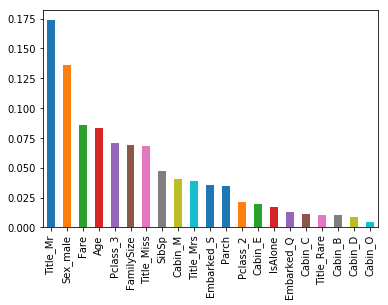

In [74]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [75]:
predictions_rf = rf.predict(s_test.iloc[:,1:])

In [76]:
# Generate Submission File 
NumSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions_clf })
NumSubmission.to_csv("NumSubmission_with_all_RF.csv", index=False)